# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [ ]:
! git clone https://github.com/vcasadei/MNIST.git

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9912422/9912422 [00:00<00:00, 104286552.33it/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 8590574.70it/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24144883.43it/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3945025.63it/s]


Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando apenas 1000 amostras do MNIST

Neste exemplo utilizaremos 1000 amostras de treinamento.

In [4]:
if False:
    n_samples_train = 1000

    dataset_train.train_data = dataset_train.train_data[:n_samples_train]
    dataset_train.train_labels = dataset_train.train_labels[:n_samples_train]

print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [15]:
model = torch.nn.Linear(28*28, 10)


In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.5292, -0.0390, -0.7640,  0.5715, -0.0992, -0.1589,  0.0095,  0.3860,
          0.4577,  0.2973]], grad_fn=<AddmmBackward0>)

In [8]:
import torch.nn.functional as F
torch.max(F.softmax(predict, dim=1), dim=1)

torch.return_types.max(
values=tensor([0.1468], grad_fn=<MaxBackward0>),
indices=tensor([3]))

## Treinamento

### Inicialização dos parâmetros

In [16]:
n_epochs = 3
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [18]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'Época: {i}/{n_epochs-1}, batch: {k}/{len(loader_train)}')


Época: 0/2, batch: 0/600
Época: 0/2, batch: 1/600
Época: 0/2, batch: 2/600
Época: 0/2, batch: 3/600
Época: 0/2, batch: 4/600
Época: 0/2, batch: 5/600
Época: 0/2, batch: 6/600
Época: 0/2, batch: 7/600
Época: 0/2, batch: 8/600
Época: 0/2, batch: 9/600
Época: 0/2, batch: 10/600
Época: 0/2, batch: 11/600
Época: 0/2, batch: 12/600
Época: 0/2, batch: 13/600
Época: 0/2, batch: 14/600
Época: 0/2, batch: 15/600
Época: 0/2, batch: 16/600
Época: 0/2, batch: 17/600
Época: 0/2, batch: 18/600
Época: 0/2, batch: 19/600
Época: 0/2, batch: 20/600
Época: 0/2, batch: 21/600
Época: 0/2, batch: 22/600
Época: 0/2, batch: 23/600
Época: 0/2, batch: 24/600
Época: 0/2, batch: 25/600
Época: 0/2, batch: 26/600
Época: 0/2, batch: 27/600
Época: 0/2, batch: 28/600
Época: 0/2, batch: 29/600
Época: 0/2, batch: 30/600
Época: 0/2, batch: 31/600
Época: 0/2, batch: 32/600
Época: 0/2, batch: 33/600
Época: 0/2, batch: 34/600
Época: 0/2, batch: 35/600
Época: 0/2, batch: 36/600
Época: 0/2, batch: 37/600
Época: 0/2, batch: 38/

In [ ]:
Época: 1/4, batch: 3/10

In [11]:
print('Final loss:', loss.data)

Final loss: tensor(0.2340)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

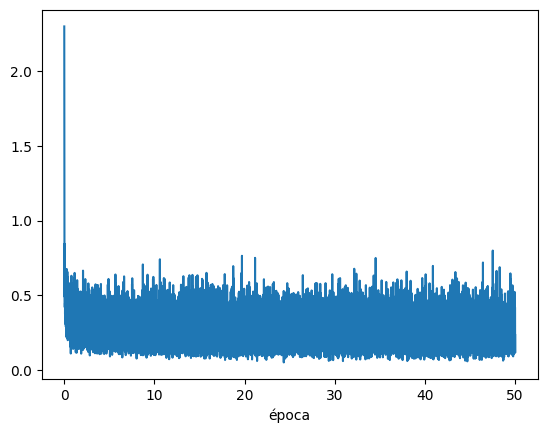

In [12]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

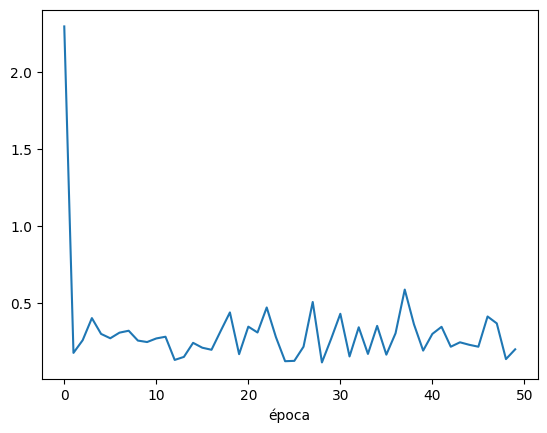

In [14]:
plt.plot(epochs[:49 * n_batches_train +1:n_batches_train], losses[:49 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?

R.: 100, 28, 28
2. Em uma época, quantos mini-batches existem?

R.: 60000/100 = 600
3. Qual é a definição de época?

R.: Iteração de treinamento sobre todos os dados de treinamento (seja em minibatch ou não)

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 3/10
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

## Conclusões sobre os experimentos deste notebook
